# SynPUF1k: Training Log Analysis
This notebook parses the HypKG training logs, plots metrics over epochs,

and computes a small summary table.

In [2]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

# Paths to your output logs
DEV_LOG  = Path("../Contextualization/src/outputs/synpuf1k_dev_AllSetTransformer_vanilla_0.txt")
TEST_LOG = Path("../Contextualization/src/outputs/synpuf1k_test_AllSetTransformer_vanilla_0.txt")

DEV_LOG, TEST_LOG

(WindowsPath('../Contextualization/src/outputs/synpuf1k_dev_AllSetTransformer_vanilla_0.txt'),
 WindowsPath('../Contextualization/src/outputs/synpuf1k_test_AllSetTransformer_vanilla_0.txt'))

In [4]:
def parse_output(path: Path) -> pd.DataFrame:
    """
    Parse HypKG dev/test output file into a DataFrame with:
    epoch, ACC_G, AUC_G, AUPR_G, F1_MACRO_G
    """
    text = path.read_text(encoding="utf-8")

    pattern = re.compile(
        r"Epoch:\s*(\d+).*?ACC_G:\s*([\d\.]+), AUC_G:\s*([\d\.]+), "
        r"AUPR_G:\s*([\d\.]+), F1_MACRO_G:\s*([\d\.]+)",
        re.S,
    )
    data = pattern.findall(text)
    df = pd.DataFrame(
        data,
        columns=["epoch", "ACC_G", "AUC_G", "AUPR_G", "F1_MACRO_G"],
    ).astype(float)
    return df

train_df = parse_output(DEV_LOG)
test_df  = parse_output(TEST_LOG)


In [5]:
train_df.head()

,epoch,ACC_G,AUC_G,AUPR_G,F1_MACRO_G
0,1.0,0.65306,0.59309,0.13134,0.44504
1,2.0,0.71429,0.70213,0.19177,0.47713
2,3.0,0.81633,0.74468,0.33751,0.53918
3,4.0,0.90816,0.78723,0.45904,0.62926
4,5.0,0.97959,0.84574,0.58670,0.82807


In [6]:
test_df.head()

,epoch,ACC_G,AUC_G,AUPR_G,F1_MACRO_G
0,1.0,0.62626,0.52309,0.07292,0.43095
1,2.0,0.68687,0.53525,0.08535,0.46205
2,3.0,0.77778,0.54740,0.11285,0.51297
3,4.0,0.89899,0.55809,0.11694,0.55645
4,5.0,0.92929,0.57900,0.11076,0.54408


# Visualization

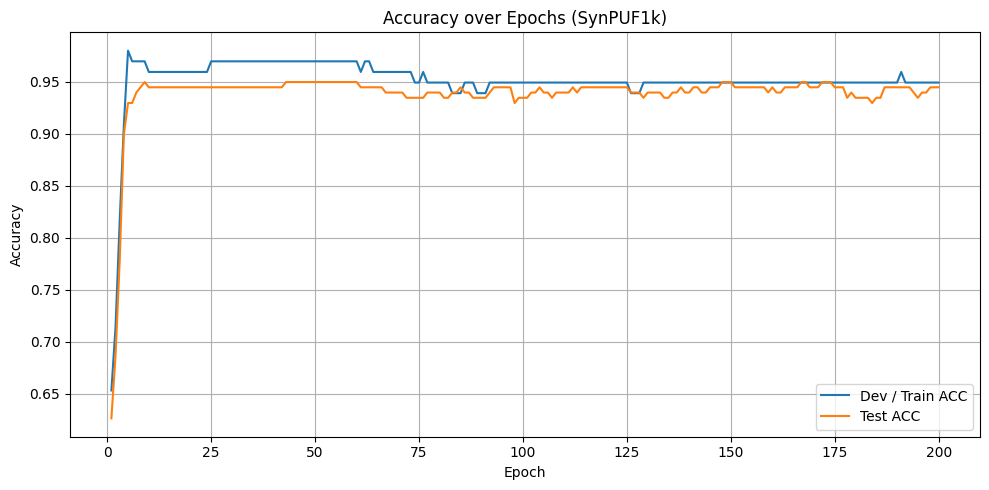

In [16]:
plt.figure()
plt.plot(train_df["epoch"], train_df["ACC_G"], label="Dev / Train ACC")
plt.plot(test_df["epoch"],  test_df["ACC_G"],  label="Test ACC")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs (SynPUF1k)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("fig_synpuf1k_acc.png")

plt.show()

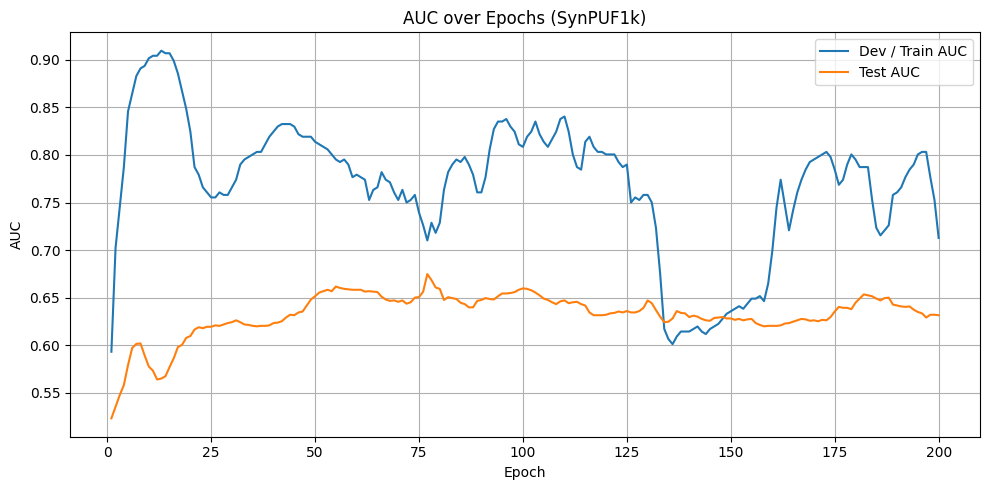

In [17]:
plt.figure()
plt.plot(train_df["epoch"], train_df["AUC_G"], label="Dev / Train AUC")
plt.plot(test_df["epoch"],  test_df["AUC_G"],  label="Test AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("AUC over Epochs (SynPUF1k)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("fig_synpuf1k_auc.png")

plt.show()

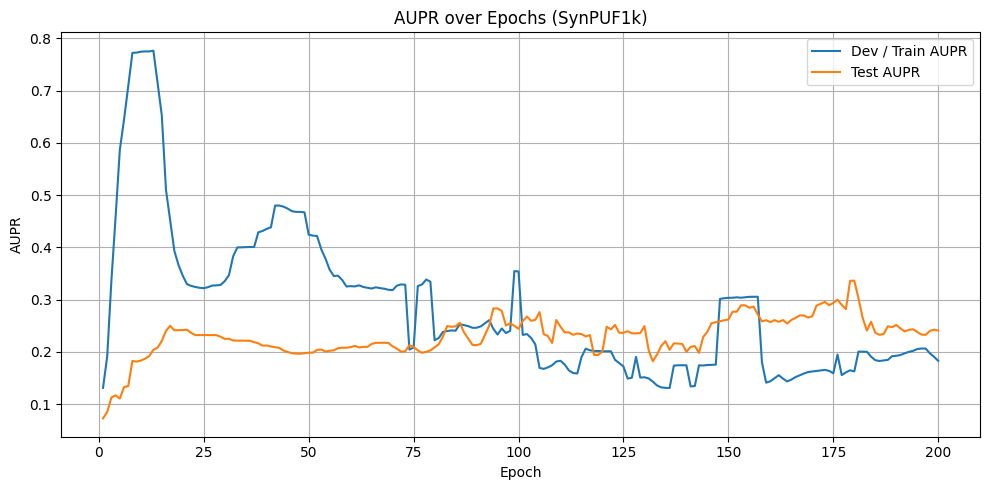

In [18]:
plt.figure()
plt.plot(train_df["epoch"], train_df["AUPR_G"], label="Dev / Train AUPR")
plt.plot(test_df["epoch"],  test_df["AUPR_G"],  label="Test AUPR")
plt.xlabel("Epoch")
plt.ylabel("AUPR")
plt.title("AUPR over Epochs (SynPUF1k)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("fig_synpuf1k_aupr.png")

plt.show()

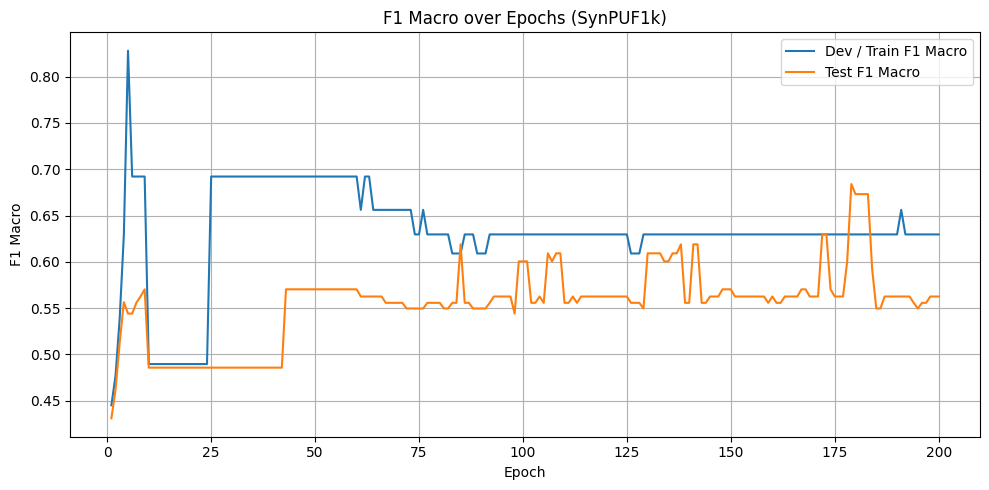

In [19]:
plt.figure()
plt.plot(train_df["epoch"], train_df["F1_MACRO_G"], label="Dev / Train F1 Macro")
plt.plot(test_df["epoch"],  test_df["F1_MACRO_G"],  label="Test F1 Macro")
plt.xlabel("Epoch")
plt.ylabel("F1 Macro")
plt.title("F1 Macro over Epochs (SynPUF1k)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("fig_synpuf1k_f1.png")
plt.show()

In [13]:
summary = pd.DataFrame({
    "Metric": ["ACC_G", "AUC_G", "AUPR_G", "F1_MACRO_G"],
    "Train Final": [
        train_df["ACC_G"].iloc[-1],
        train_df["AUC_G"].iloc[-1],
        train_df["AUPR_G"].iloc[-1],
        train_df["F1_MACRO_G"].iloc[-1],
    ],
    "Test Final": [
        test_df["ACC_G"].iloc[-1],
        test_df["AUC_G"].iloc[-1],
        test_df["AUPR_G"].iloc[-1],
        test_df["F1_MACRO_G"].iloc[-1],
    ],
})

summary

,Metric,Train Final,Test Final
0,ACC_G,0.94898,0.94444
1,AUC_G,0.71277,0.63150
2,AUPR_G,0.18296,0.24073
3,F1_MACRO_G,0.62963,0.56256
